In [1]:
import json

In [2]:
with open('nsynth-valid.jsonwav/nsynth-valid/examples.json') as f:
    rawData = json.load(f)

In [3]:
pitches = []
for i in range(len(rawData)):
    pitches.append(rawData[list(rawData.keys())[i]]['pitch'])

In [9]:
print(set(pitches))
print(len(set(pitches)))

{9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120}
112


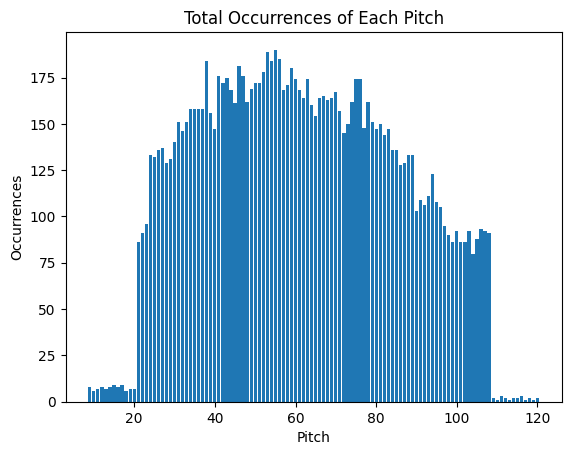

In [4]:
from collections import Counter
import pandas as pd

import matplotlib.pyplot as plt

# Count the occurrences of each pitch
pitch_counts = Counter(pitches)

# Create the plot
plt.bar(pitch_counts.keys(), pitch_counts.values())
plt.xlabel('Pitch')
plt.ylabel('Occurrences')
plt.title('Total Occurrences of Each Pitch')
plt.show()

In [5]:
import pandas as pd

pitchDF = pd.DataFrame(pitches)
print(pitchDF.describe())

                  0
count  12678.000000
mean      61.529894
std       23.543176
min        9.000000
25%       42.000000
50%       60.000000
75%       80.000000
max      120.000000


<Axes: xlabel='0'>

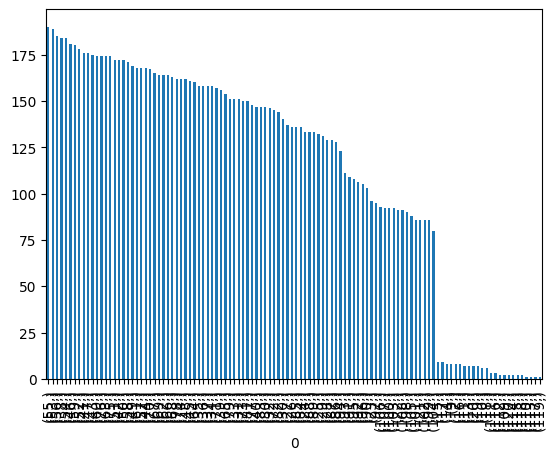

In [6]:
pitchDF.value_counts().plot(kind='bar')

In [7]:
pitchDF.value_counts()

0  
55     190
53     189
56     185
38     184
54     184
      ... 
118      2
110      1
113      1
117      1
119      1
Name: count, Length: 112, dtype: int64

In [7]:
data = []

for d in rawData:
    if (rawData[d]['instrument_family'] in [0, 1, 3, 4, 7, 8] and rawData[d]['instrument_source_str'] == 'acoustic'):
        data.append({"audioFile" : d, "instrument" : rawData[d]['instrument_family'], "note" : rawData[d]['note'], "pitch" : rawData[d]['pitch']})

In [8]:
samePitch = []
for d in data:
    if d['pitch'] == 60:
        samePitch.append(d)
        print(d["audioFile"])

keyboard_acoustic_004-060-025
reed_acoustic_011-060-100
reed_acoustic_018-060-100
string_acoustic_056-060-050
brass_acoustic_015-060-050
string_acoustic_014-060-100
brass_acoustic_015-060-075
string_acoustic_014-060-127
reed_acoustic_037-060-075
guitar_acoustic_021-060-127
reed_acoustic_023-060-050
reed_acoustic_018-060-127
guitar_acoustic_010-060-025
brass_acoustic_046-060-075
guitar_acoustic_021-060-050
guitar_acoustic_014-060-075
brass_acoustic_016-060-025
brass_acoustic_006-060-127
reed_acoustic_023-060-025
string_acoustic_057-060-025
keyboard_acoustic_004-060-050
guitar_acoustic_015-060-100
brass_acoustic_015-060-100
guitar_acoustic_014-060-100
string_acoustic_057-060-075
brass_acoustic_059-060-050
string_acoustic_014-060-075
string_acoustic_014-060-050
brass_acoustic_046-060-050
guitar_acoustic_021-060-075
brass_acoustic_046-060-100
string_acoustic_056-060-025
reed_acoustic_037-060-025
string_acoustic_057-060-050
guitar_acoustic_010-060-075
guitar_acoustic_015-060-127
keyboard_ac

In [28]:
import shutil

for i in range(10):
    shutil.copyfile('./nsynth-valid.jsonwav/nsynth-valid/audio/'+samePitch[i]["audioFile"]+".wav", './samePitch/'+samePitch[i]["audioFile"]+".wav")

In [9]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

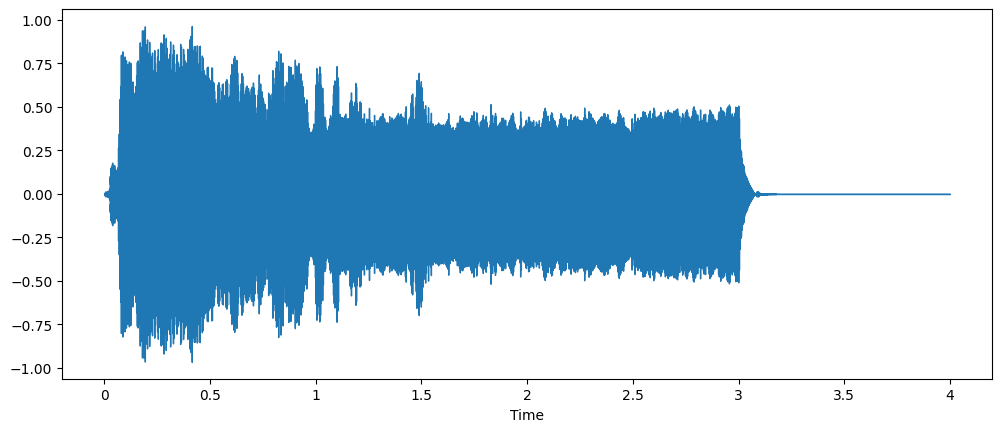

In [39]:
array, sampling_rate = librosa.load("./nsynth-valid.jsonwav/nsynth-valid/audio/" + data[1]["audioFile"]+".wav")
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

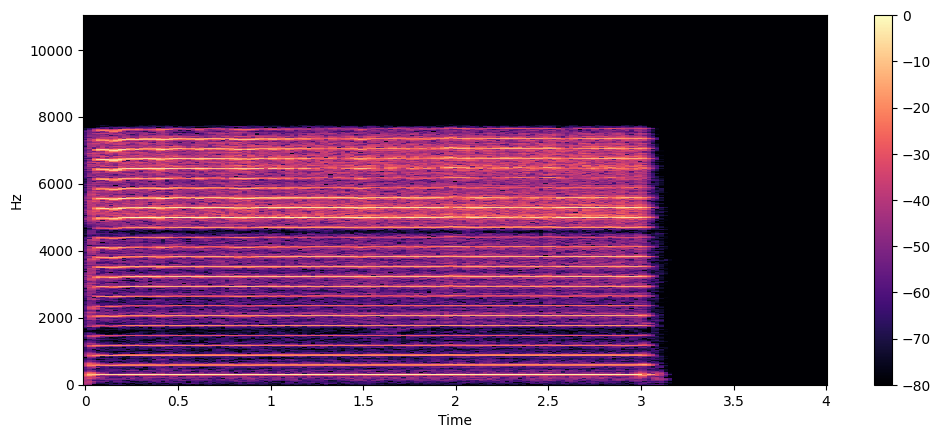

In [40]:
D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

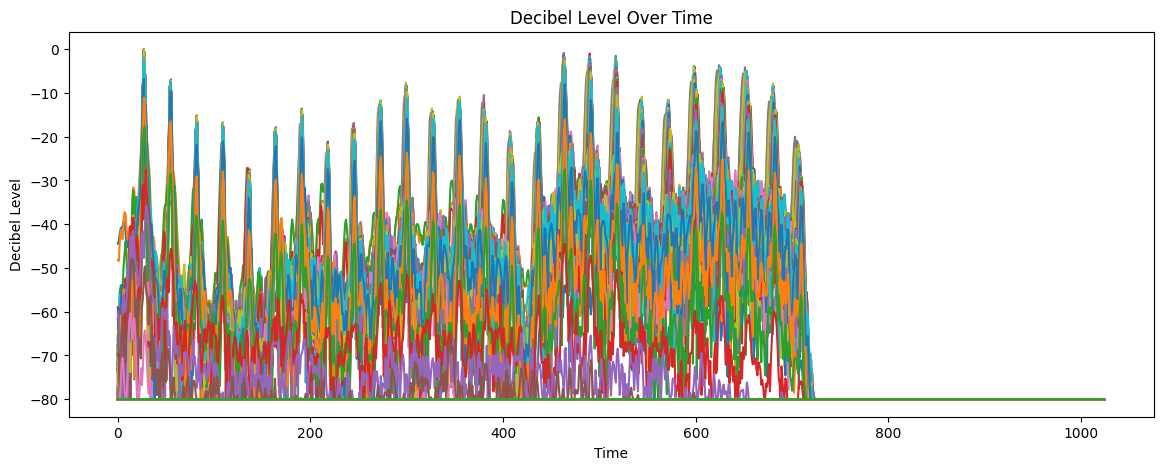

In [41]:

plt.figure(figsize=(14, 5))
plt.plot(S_db)
plt.xlabel('Time')
plt.ylabel('Decibel Level')
plt.title('Decibel Level Over Time')
plt.show()

In [10]:
import random
from pydub import AudioSegment
from tqdm import tqdm

In [19]:
for i in range(len(data)):
    audio = AudioSegment.from_wav("./nsynth-valid.jsonwav/nsynth-valid/audio/" + data[i]["audioFile"]+".wav")
    cropped_audio = audio[:3000 + random.randint(-1000, 1000)]
    cropped_audio.export("./data/validateTemp/"+data[i]["audioFile"]+".wav", format="wav")
    

In [11]:
tempData = data[3000:]
for i in tqdm(range(len(tempData))):
    array, sampling_rate = librosa.load("./data/validateTemp/" + tempData[i]["audioFile"]+".wav")
    D = librosa.stft(array)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure().set_figwidth(12)
    plt.axis('off')
    librosa.display.specshow(S_db)
    plt.savefig("./data/validate/"+tempData[i]["audioFile"]+"__"+str(tempData[i]["pitch"])+".png", bbox_inches='tight', pad_inches=0)
    plt.close('all')


100%|██████████| 1223/1223 [02:52<00:00,  7.08it/s]
